In [1]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import numpy as np
import pysal as ps
import folium

from shapely.geometry import Point

from folium import IFrame
from folium.plugins import MarkerCluster

In [2]:
rents_df_new = pd.read_csv('./data/rent/geocoded_rents.csv', sep=',', encoding='utf-8')

In [3]:
rents_df_new.head()

Unnamed: 0         ID Haus/Wohnung         ID.1 Miete/Kauf  \
0           0  100027976      Wohnung  100027976.0      Miete   
1           1  100122011      Wohnung  100122011.0      Miete   
2           2  100149210      Wohnung  100149210.0      Miete   
3           3  100150862      Wohnung  100150862.0      Miete   
4           4  100155473      Wohnung  100155473.0      Miete   

                                             address  balcony  builtInKitchen  \
0        Pohlestraße 14, Köpenick (Köpenick), Berlin     True            True   
1      Soldiner Straße 35, Wedding (Wedding), Berlin    False           False   
2   Vopeliuspfad 10, Zehlendorf (Zehlendorf), Berlin     True            True   
3  Rudolf-von-Gneist-Gasse 1, Tiergarten (Tiergar...     True            True   
4  Wackenbergstr. 57, Niederschönhausen (Pankow),...     True            True   

     city  floorplan    ...    numberOfRooms  postcode    price  privateOffer  \
0  Berlin       True    ...              3.0   12557.0   828.00         False   
1  Berlin      False    ...              2.0   13359.0  1086.00         False   
2  Berlin       True    ...              6.0   14169.0  2760.00         False   
3  Berlin       True    ...              2.0   10785.0  1636.00         False   
4  Berlin       True    ...              2.0   13156.0   636.76          True   

                      quarter  \
0         Köpenick (Köpenick)   
1           Wedding (Wedding)   
2     Zehlendorf (Zehlendorf)   
3     Tiergarten (Tiergarten)   
4  Niederschönhausen (Pankow)   

                                               title  \
0  3 RaumWohnung; Balkon +Dach Garten Anteil + EB...   
1  !!! DREI NETTOKALTMIETEN FREI !!! - Große 2-Zi...   
2  ++Eindrucksvolle Altbauwohnung im 2. OG mit 3 ...   
3  #Skylights: Dachgeschossmaisonette mit großer ...   
4  Schön Wohnen im Erdgeschoss mit Terrasse und "...   

                                                 url price_sq_m      lat1  \
0  https://www.immobilienscout24.de/expose/100027976   9.975904  52.44056   
1  https://www.immobilienscout24.de/expose/100122011  12.998205  52.55992   
2  https://www.immobilienscout24.de/expose/100149210  11.596639  52.43492   
3  https://www.immobilienscout24.de/expose/100150862  16.007828  52.50677   
4  https://www.immobilienscout24.de/expose/100155473   8.496931  52.58621   

       lon1  
0  13.58415  
1  13.38284  
2  13.26728  
3  13.37421  
4  13.41376  

[5 rows x 23 columns]

In [4]:
rents_df_new.loc[pd.isna(rents_df_new['lat1'])].shape

(0, 23)

In [5]:
rents_geom = [Point(xy) for xy in zip(rents_df_new.lon1, rents_df_new.lat1)]

rents_df_temp = rents_df_new.drop(['lat1', 'lon1'], axis = 1)
crs = {'init': 'epsg:4326'}

rents_gdf = gpd.GeoDataFrame(rents_df_temp, crs=crs, geometry=rents_geom)

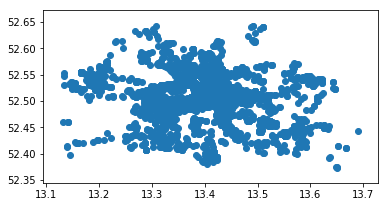

In [6]:
rents_gdf.plot()

In [7]:
rents_gdf.shape

(3262, 22)

In [9]:
berlin_file = "./data/Berlin__RBSOrtsteile"

berlin_df = gpd.read_file(berlin_file, encoding='utf-8')

print(type(berlin_df))

berlin_df

<class 'geopandas.geodataframe.GeoDataFrame'>


OBJECTID   ORT                 Ortsteilna Beznr  \
0          1  1102                 Karlshorst    11   
1          2  0312                  Rosenthal    03   
2          3  0706                Lichtenrade    07   
3          4  0405                    Westend    04   
4          5  1001                    Marzahn    10   
5          6  0103               Hansaviertel    01   
6          7  0905          Niederschöneweide    09   
7          8  0502                 Haselhorst    05   
8          9  0703                  Tempelhof    07   
9         10  0509               Wilhelmstadt    05   
10        11  0309                       Buch    03   
11        12  0803                     Buckow    08   
12        13  0403              Schmargendorf    04   
13        14  1004                  Mahlsdorf    10   
14        15  0301            Prenzlauer Berg    03   
15        16  0505                      Gatow    05   
16        17  0106              Gesundbrunnen    01   
17        18  1208                     Lübars    12   
18        19  0902                Plänterwald    09   
19        20  1109       Neu-Hohenschönhausen    11   
20        21  0607                    Wannsee    06   
21        22  0704                 Mariendorf    07   
22        23  0310       Französisch Buchholz    03   
23        24  0804                      Rudow    08   
24        25  0404                  Grunewald    04   
25        26  0101                      Mitte    01   
26        27  0911            Friedrichshagen    09   
27        28  1005                Hellersdorf    10   
28        29  0304                Heinersdorf    03   
29        30  0602               Lichterfelde    06   
..       ...   ...                        ...   ...   
66        67  1204                Heiligensee    12   
67        68  0313                Wilhelmsruh    03   
68        69  0603                   Lankwitz    06   
69        70  0702                  Friedenau    07   
70        71  1210         Märkisches Viertel    12   
71        72  1104                 Falkenberg    11   
72        73  0402                Wilmersdorf    04   
73        74  0802                      Britz    08   
74        75  0306  Stadtrandsiedlung Malchow    03   
75        76  0915                Schmöckwitz    09   
76        77  1205                    Frohnau    12   
77        78  0105                    Wedding    01   
78        79  0907                  Adlershof    09   
79        80  0504                    Staaken    05   
80        81  0914                 Müggelheim    09   
81        82  0604                 Zehlendorf    06   
82        83  1101            Friedrichsfelde    11   
83        84  0705                Marienfelde    07   
84        85  1107                 Wartenberg    11   
85        86  0901                Alt-Treptow    09   
86        87  0102                     Moabit    01   
87        88  0910                   Köpenick    09   
88        89  0303                Blankenburg    03   
89        90  1211                Borsigwalde    12   
90        91  0601                   Steglitz    06   
91        92  1111                  Fennpfuhl    11   
92        93  0202                  Kreuzberg    02   
93        94  0904               Johannisthal    09   
94        95  1202                      Tegel    12   
95        96  0501                    Spandau    05   

                       Bezname  \
0                  Lichtenberg   
1                       Pankow   
2         Tempelhof-Schöneberg   
3   Charlottenburg-Wilmersdorf   
4          Marzahn-Hellersdorf   
5                        Mitte   
6             Treptow-Köpenick   
7                      Spandau   
8         Tempelhof-Schöneberg   
9                      Spandau   
10                      Pankow   
11                    Neukölln   
12  Charlottenburg-Wilmersdorf   
13         Marzahn-Hellersdorf   
14                      Pankow   
15                     Spandau   
16             

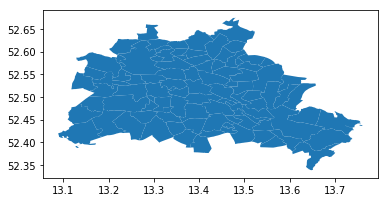

In [10]:
berlin_df.plot()

In [12]:
berlin_df.shape

(96, 6)

In [11]:
rents_with_districts = gpd.sjoin(berlin_df, rents_gdf)

In [13]:
rents_with_districts.shape

(3253, 28)

In [14]:
avg_rents = gpd.sjoin(berlin_df, rents_gdf).groupby('OBJECTID').agg({'price_sq_m' : np.mean})

In [15]:
rents_with_districts.shape, avg_rents.shape

((3253, 28), (88, 1))

In [16]:
avg_rents_with_districts = pd.merge(berlin_df, avg_rents, left_on='OBJECTID', right_on='OBJECTID')

In [17]:
avg_rents_with_districts.head()

OBJECTID   ORT   Ortsteilna Beznr                     Bezname  \
0         1  1102   Karlshorst    11                 Lichtenberg   
1         2  0312    Rosenthal    03                      Pankow   
2         3  0706  Lichtenrade    07        Tempelhof-Schöneberg   
3         4  0405      Westend    04  Charlottenburg-Wilmersdorf   
4         5  1001      Marzahn    10         Marzahn-Hellersdorf   

                                            geometry  price_sq_m  
0  POLYGON ((13.5058337078815 52.4911663667287, 1...   10.556429  
1  POLYGON ((13.3748609896621 52.5849015535632, 1...   11.903962  
2  POLYGON ((13.3963154428129 52.4175789962893, 1...    9.284803  
3  POLYGON ((13.2874646673229 52.5023678928998, 1...   13.092441  
4  POLYGON ((13.5185982721988 52.5145347292375, 1...    8.177116

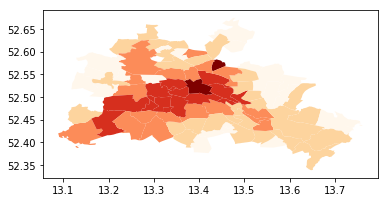

In [18]:
avg_rents_with_districts.plot(column='price_sq_m', cmap='OrRd', scheme='Fisher_Jenks')

In [45]:
print('Producing folium choropleth and cluster marker visualization for rents')
# Create a Folium basemap centered in Berlin 
rents_map = folium.Map([52.5161,13.3770], zoom_start = 10)

def add_choropleth_to_map(mapobj):

    # Generate the list of threshold values for classification based on a Fisher Jenks classifier
    my_threshold_scale = ps.esda.mapclassify.Fisher_Jenks(avg_rents_with_districts['price_sq_m']).bins.tolist()
    
    # Call the Folium choropleth function, specifying the geometry from the GeoDataFrame converted to GeoJSON 
    # and the data as the GeoDataFrame
    mapobj.choropleth(geo_data = avg_rents_with_districts.to_json(), data = avg_rents_with_districts, \
                      columns = ['OBJECTID', 'price_sq_m'], key_on = 'feature.properties.{}'.format('OBJECTID'), \
                      fill_color = 'YlOrRd', fill_opacity = 0.6, line_opacity = 0.2, \
                      threshold_scale = my_threshold_scale)
    
    for idx, row in avg_rents_with_districts.iterrows():
        popup = row['Ortsteilna'] + "\n" + str(row['price_sq_m'])
        #popup = IFrame(popup_label, width = 300, height = 100)
        folium.CircleMarker([row.geometry.centroid.y, row.geometry.centroid.x], popup=popup,
                        radius=2, color='white').add_to(mapobj)
        
    
    return mapobj

# Add the choropleth to the basemap
rents_map=add_choropleth_to_map(rents_map)

Producing folium choropleth and cluster marker visualization for rents


In [46]:
def add_clusters_to_map(mapobj):
    
    # The location coordinates and the pop-ups for the single activity markers
    coords, popups = [], [] 
    
    # The information to be shown in the marker pop-ups
    popup_fields = ['url', 'price_sq_m']
    
    for i, row in rents_gdf.iterrows():
        # Populate the list of coordinates with the list of activites
        coords.append([row.geometry.y, row.geometry.x])
        
        # Create HTML for the IFrame popup
        label = '<br>'.join([str(row[field]) for field in popup_fields])
        
        # Append the IFrame containing the HTML to the pop-ups list 
        popups.append(IFrame(label, width = 300, height = 100))
        
    # Create a Folium feature group, since we will be displaying multiple layers
    point_layer = folium.FeatureGroup(name = 'point_layer')
    
    # Add the clustered points and pop-ups to this layer
    point_layer.add_child(MarkerCluster(locations = coords, popups = popups))
    
    # Add this point layer to the map object
    mapobj.add_child(point_layer)
    
    return mapobj

# Add the clusters layer to the map 
rents_map = add_clusters_to_map(rents_map)

In [47]:
folium.LayerControl().add_to(rents_map) # Allows layers to be toggled on/off in the map

rents_map.save('rents_map2.html') # Save map as HTML file

print('Saving visualization under: rents_map.html')

Saving visualization under: rents_map.html


In [30]:
rents_map